#### Medical conditions observable in your scientific computing analysis. Electrocardiogram (ECG) is the process of producing a recording of the heart's electrical activity through repeated cardiac cycles. An ECG is visualized as a graph of voltage versus time. The voltage is the electrical activity of the heart measured by placing electrodes on the skin.
Python has a built-in ECG dataset <br>
from scipy.misc import electrocardiogram<br>
Sampling rate is 360 Hz
ecg = electrocardiogram() <br> 

• Unfortunately, this patient has patterns of unusual heart beats.<br>
• For reference, the time period 9 seconds to 10.2 seconds is a set of normal heart activity. <br>
• From 46.5 seconds to 50 seconds the ECG shows what doctors call premature ventricular contractions. <br>
• Time period 207 seconds to 215 seconds show significant abnormal activity. <br> 

We will find out FFT and spectrograms to be used to help diagnose heart conditions. Specifically, we will compute FFT and spectrograms for the three time periods above as well as the entire time period to observe conditions.

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.fft import fft
from scipy.misc import electrocardiogram

In [125]:
#sampling rate is 360 Hz
ecg = electrocardiogram()
fs = 360

In [126]:
#time periods
normalTimePeriod = (9, 10.2)
pvcTimePeriod = (46.5, 50)    # premature ventricular contractions (pvc)
abnormalTimePeriod = (207, 215)

In [127]:
#computing time index for all the different periods
normalStartValue = int(9*360)
normalEndValue = int(10.2*360)

PrematureStartValue = int(46.5*360)
PrematureEndValue = int(50*360)

abnormalStartValue = int(207*360)
abnormalEndValue = int(215*360)

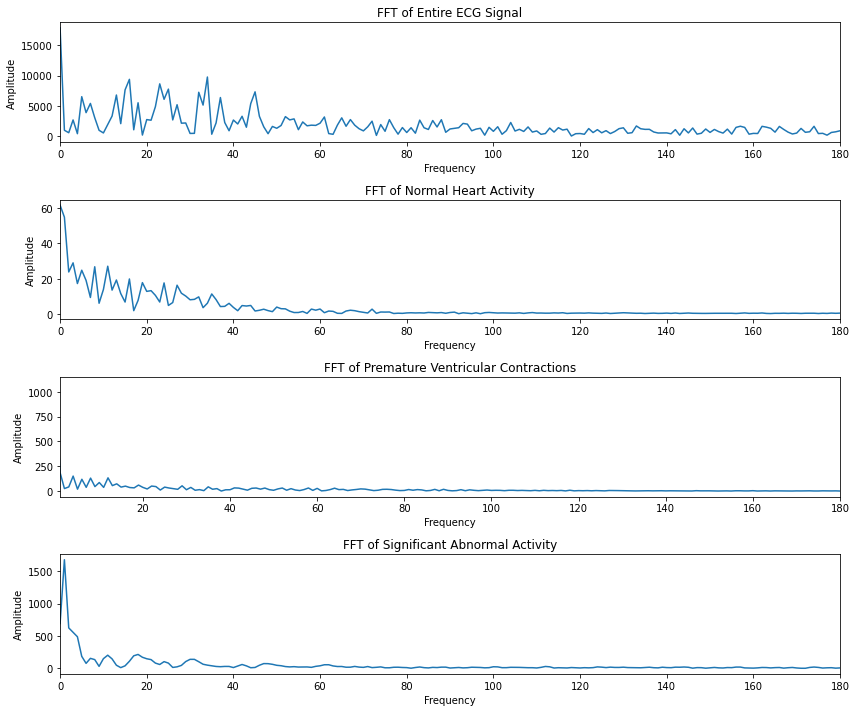

In [137]:
#FFTs

plt.figure(figsize=(12, 10))

#FFT for the entire ECG signal
fftecg = fft(ecg)
plt.subplot(4, 1, 1)
plt.plot(np.abs(fftecg))
plt.xlim(0,180)      #looking for half of the smapling rate
plt.title('FFT of Entire ECG Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

#FFT for the specified time periods
fftNormal = fft(ecg[normalStartValue:normalEndValue])
plt.subplot(4, 1, 2)
plt.plot(np.abs(fftNormal))
plt.xlim(0,180)
plt.title('FFT of Normal Heart Activity')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

#FFT for pvc
fftPremature = fft(ecg[PrematureStartValue:PrematureEndValue])
plt.subplot(4, 1, 3)
plt.plot(np.abs(fftPremature))
plt.xlim(1,180)
plt.title('FFT of Premature Ventricular Contractions')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

#FFT for abnormal
fftAbnormal = fft(ecg[abnormalStartValue:abnormalEndValue])
plt.subplot(4, 1, 4)
plt.plot(np.abs(fftAbnormal))
plt.xlim(0,180)
plt.title('FFT of Significant Abnormal Activity')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

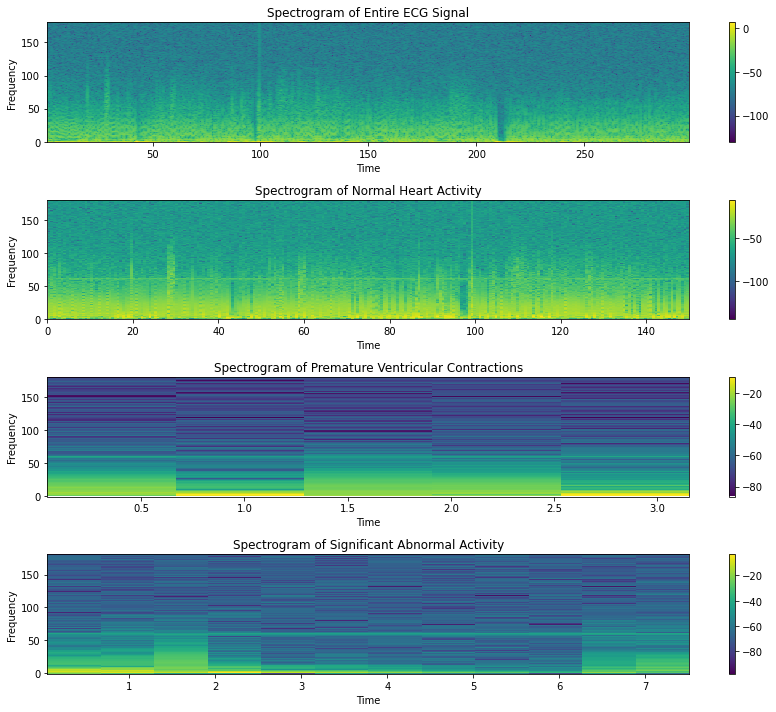

In [136]:
#spectrograms

plt.figure(figsize=(12, 10))

#spectrogram for the entire ECG signal
freqs, times, Sx = spectrogram(ecg, fs=360, window='hanning', nperseg=1024,
                                            noverlap=924, detrend=False, 
                                            scaling='spectrum')

plt.subplot(4, 1, 1)
plt.pcolormesh(times, freqs, 10 * np.log10(Sx))
plt.title('Spectrogram of Entire ECG Signal')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.colorbar()

#spectrogram for normal
freqs, times, Sx = spectrogram(ecg, fs=360)
plt.subplot(4, 1, 2)
plt.pcolormesh(times, freqs, 10 * np.log10(Sx))
plt.title('Spectrogram of Normal Heart Activity')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.xlim(0,150)
plt.colorbar()

#spectrogram for pvc
freqsPVC, timesPVC, SxP = spectrogram(ecg[PrematureStartValue:PrematureEndValue],fs=360)
plt.subplot(4, 1,3)
plt.pcolormesh(timesPVC, freqsPVC,10 * np.log10(SxP))
plt.title('Spectrogram of Premature Ventricular Contractions')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.colorbar()

#spectrogram for abnormal
freqsAbnormal, timesAbnormal, SxA = spectrogram(ecg[abnormalStartValue:abnormalEndValue], fs=360, )
plt.subplot(4, 1, 4)
plt.pcolormesh(timesAbnormal, freqsAbnormal, 10 * np.log10(SxA))
plt.title('Spectrogram of Significant Abnormal Activity')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.colorbar()

plt.tight_layout()
plt.show()